In [51]:
from skimage.io import imread, imsave
import numpy as np
import torch
import os
import glob
from PIL import Image
from scipy.spatial.distance import pdist
from skimage.exposure import match_histograms
from skimage.measure import compare_ssim as ssim
from PIL import Image
import cv2

In [26]:
def euclidean(image1, image2):
    X = np.vstack([image1, image2])
    return pdist(X, 'euclidean')[0]

def manhattan(image1, image2):
    X = np.vstack([image1, image2])
    return pdist(X, 'cityblock')[0]

def chebyshev(image1, image2):
    X = np.vstack([image1, image2])
    return pdist(X, 'chebyshev')[0]

def cosine(image1, image2):
    X = np.vstack([image1, image2])
    return pdist(X, 'cosine')[0]

def pearson(image1, image2):
    X = np.vstack([image1, image2])
    return np.corrcoef(X)[0][1]

def jaccard(image1, image2):
    X = np.vstack([image1, image2])
    return pdist(X, 'jaccard')[0]

def mahalanobis(image1, image2):
    X = np.vstack([image1, image2])
    XT = X.T
    return pdist(XT, 'mahalanobis')

def jensenshannon(image1, image2):
    X = np.vstack([image1, image2])
    return pdist(X, 'jensenshannon')[0]

In [27]:
for i in range(7):
    num = 0
    min_dis = 10000000000
    alpha_2015 = Image.open('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs/1_1030/proc-alpha-00_layer-0%d.png'%i)
    for j in range(7):
        alpha_2016 = Image.open('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs/1_1076/proc-alpha-00_layer-0%d.png'%j)
        img_2015 = np.asarray(alpha_2015).flatten()
        img_2016 = np.asarray(alpha_2016).flatten()
        dis = jaccard(img_2015, img_2016)
        if dis<min_dis:
            min_dis = dis
            num = j
        # print("{} - {}".format(i, j),dis)
    print("%d -"%i,num, min_dis)

FileNotFoundError: [Errno 2] No such file or directory: 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs/1_1030/proc-alpha-00_layer-00.png'

In [30]:
# coding=utf-8
# 导入python包
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

def mse(imageA, imageB):
	# 计算两张图片的MSE指标
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# 返回结果，该值越小越好
	return err

def compare_images(imageA, imageB, title):
	# 分别计算输入图片的MSE和SSIM指标值的大小
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)

	# 创建figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

	# 显示第一张图片
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")

	# 显示第二张图片
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	plt.tight_layout()
	plt.show()


In [28]:
im1 = imread('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs/1_1158/proc-alpha-00_layer-05.png')
im2 = imread('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs/1_897/proc-alpha-00_layer-05.png')
im1 = im1[:,:,0]
im2 = im2[:,:,0]

<ipython-input-30-2b9890cfcadd>:19: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  s = ssim(imageA, imageB)


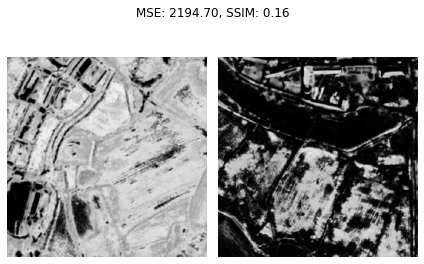

In [31]:
compare_images(im1, im2, "im1 vs im2")

In [38]:
im1[100:200,100:200]

array([[ 7,  0,  3, ..., 77, 78, 77],
       [ 0,  0,  5, ..., 77, 77, 77],
       [ 0,  0, 11, ..., 77, 77, 76],
       ...,
       [78, 78, 79, ..., 63, 66, 69],
       [78, 78, 79, ..., 63, 64, 65],
       [79, 79, 79, ..., 62, 62, 61]], dtype=uint8)

In [39]:
im2[100:200,100:200]

array([[ 1,  1,  1, ..., 10, 10, 13],
       [ 1,  1,  0, ...,  6,  7,  8],
       [ 1,  1,  0, ...,  5,  6,  4],
       ...,
       [ 1,  0,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0]], dtype=uint8)

In [16]:
# 读取图片
original1 = cv2.imread("test3.jpg")
contrast1 = cv2.imread("test3_adjust1.jpg")
shopped1 = cv2.imread("test2.jpg")

# 将彩色图转换为灰度图
original = cv2.cvtColor(original1, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast1, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped1, cv2.COLOR_BGR2GRAY)

# 初始化figure对象
fig = plt.figure("Images")
images = ("Original", original), ("Enhance", contrast), ("Others", shopped)

# 遍历每张图片
for (i, (name, image)) in enumerate(images):
	# 显示图片
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
plt.tight_layout()
plt.show()

# 比较图片
compare_images(original, original, "Original vs Original")
compare_images(original, contrast, "Original vs Enhance")
compare_images(original, shopped, "Original vs Others")

array([[[  2,   2,   2],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [129, 129, 129],
        [129, 129, 129],
        [129, 129, 129]],

       [[  2,   2,   2],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [129, 129, 129]],

       [[  2,   2,   2],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [129, 129, 129]],

       ...,

       [[ 17,  17,  17],
        [ 15,  15,  15],
        [ 11,  11,  11],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  5,   5,   5]]

### ==========================================================================================

In [2]:
source_list = glob.glob('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs/*')
ref_list = glob.glob('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs/*')
name = ["/proc-alpha-00_layer-%02d.png"%x for x in range(7)]
rgb = ['/rgb-00_layer-%02d.png'%x for x in range(7)]
alpha = ['/proc-alpha-00_layer-%02d.png'%x for x in range(7)]

In [3]:
source_list

['F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs\\1_1034',
 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs\\1_1035',
 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs\\1_104',
 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs\\1_106',
 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs\\1_1061',
 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs\\1_1062',
 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fs

In [4]:
source_list[0]+alpha[4]

'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs\\1_1034/proc-alpha-00_layer-04.png'

In [ ]:
path = 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_change2/'
for x in source_list:
    flag = 0
    flag_num = 0
    for i in range(len(ref_list)):
        dis = []
        for j in range(7):
            source = imread(x+name[j])[:,:,0]
            ref = imread(ref_list[i]+name[j])[:,:,0]
            ssim_dis = ssim(source, ref)
            dis.append(ssim_dis)
        dis_avg = sum(dis)/len(dis)
        if dis_avg > flag:
            flag = dis_avg
            flag_num = i
    rgb_list = []
    alpha_list = []
    print(flag_num)
    print(ref_list[flag_num])
    for k in range(7):
        source_rgb = imread(x+rgb[k])
        ref_rgb = imread(ref_list[flag_num]+ rgb[k])
        rgb_list.append(match_histograms(source_rgb, ref_rgb, multichannel=True))
        alpha_list.append(imread(x+alpha[k]))
    alpha_list = np.array(alpha_list)/255
    rgb_list = np.array(rgb_list)/255
    image = (alpha_list*rgb_list*255).sum(axis = 0).astype(np.uint8)
    imsave(path+x.split('\\')[-1]+'.png',image)
    

<ipython-input-5-1d2b79f958df>:10: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_dis = ssim(source, ref)


65
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1588
524
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_475
85
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1774
65
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1588
65
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1588
65
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1588
524
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_475
65
F:/Satellite dataset Ⅱ (East As

F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1774
524
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_475
524
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_475
524
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_475
65
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1588
85
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1774
65
F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\1_1588
85
F:/Satellite dataset Ⅱ (East Asia)

In [5]:
ref_list[451]

'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs\\1_4163'

In [62]:
a = np.ones((7,256,256,3))
b = np.ones((7,256,256,3))
c = (a*b).sum(axis = 0)
print(c.shape)

(256, 256, 3)


In [64]:
path = 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_change2/'
path+source_list[0].split('\\')[-1]+'.png'

'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_change2/1_1034.png'

In [ ]:
source_list = glob.glob('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_fscs/*')
ref_list = glob.glob('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs/*')
name = ["/proc-alpha-00_layer-%02d.png"%x for x in range(7)]
rgb = ['/rgb-00_layer-%02d.png'%x for x in range(7)]
alpha = ['/proc-alpha-00_layer-%02d.png'%x for x in range(7)]

path = 'F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test_change2/'
for x in source_list:
    flag = 0
    flag_num = 0
    for i in range(len(ref_list)):
        dis = []
        for j in range(7):
            source = imread(x+name[j])[:,:,0]
            ref = imread(ref_list[i]+name[j])[:,:,0]
            ssim_dis = ssim(source, ref)
            dis.append(ssim_dis)
        dis_avg = sum(dis)/len(dis)
        if dis_avg > flag:
            flag = dis_avg
            flag_num = i
    rgb_list = []
    alpha_list = []
    print(flag_num)
    print(ref_list[flag_num])
    for k in range(7):
        source_rgb = imread(x+rgb[k])
        ref_rgb = imread(ref_list[flag_num]+ rgb[k])
        rgb_list.append(match_histograms(source_rgb, ref_rgb, multichannel=True))
        alpha_list.append(imread(x+alpha[k]))
    alpha_list = np.array(alpha_list)/255
    rgb_list = np.array(rgb_list)/255
    image = (alpha_list*rgb_list*255).sum(axis = 0).astype(np.uint8)
    imsave(path+x.split('\\')[-1]+'.png',image)
    os.remove(ref_list[flag_num])
    ref_list = glob.glob('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_fscs/*')

In [23]:
im1 = imread('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image/1_219.tif')
im2 = imread('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test/1_153.tif')

In [24]:
dis = ssim(im1, im2, multichannel=True)
dis

<ipython-input-24-040f088fc080>:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  dis = ssim(im1, im2, multichannel=True)


0.0767572558597205

In [46]:
im1 = Image.open('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image/1_219.tif')
im2 = Image.open('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image_test/1_153.tif')
# im1 = im1.convert('L')
# im2 = im2.convert('L')

In [52]:
img = cv2.imread('F:/Satellite dataset Ⅱ (East Asia)/Satellite dataset Ⅱ (East Asia)/1. The cropped image data and raster labels/train/image/1_219.tif', cv2.IMREAD_GRAYSCALE)

AttributeError: 'NoneType' object has no attribute 'shape'